In [1]:
from src.data import FTRC_Data
from src.modeling import *
import json
from pathlib import Path

import seaborn as sns

from src.analysis import *
from src.data import FTRC_Data

import warnings
warnings.filterwarnings('ignore')

import shap

In [2]:
# # Training Set with P28A and M36 100% SOC data 

# # Import battery failure data bank
# data = FTRC_Data()
# # 
# # data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# # Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
# cells_to_remove = [
#     'Soteria 18650 (AL)',
#     'Soteria 18650 (ALCU)',
#     'Soteria 18650 (CU)',
#     'Soteria 18650 (DW)',
#     'Soteria 18650 (ALDW)',
#     'Soteria 18650 (ALCUDW)',
#     'Soteria 18650 (Control)',
#     'Saft D-Cell-VES16',
#     'MOLiCEL 18650-J',
#     'MOLiCEL 18650-M35A',
# #     'MOLiCEL 18650-P28A', #remove if want in training set
#     'MOLiCEL 18650-Test Cell',
#     'MOLiCEL 18650-Test Cell (DW-Gold)',
#     'MOLiCEL 18650-Test Cell (DW-Silver)',
#     'LG 18650-HG2',
# #     'LG 18650-M36', #remove if want in training set 
#     'LG 18650-Test Cell (NBV-220)',
#     'LG 18650-Test Cell (NBV-250)',
#     'Panasonic 18650-BE',
#     'Samsung 18650-26J',
#     'Samsung 18650-30Q',
#     'Sony 18650-VTC6',
#     ]
# for cell in cells_to_remove:
#     data.remove(cell)

# df = data.df

# df.loc[:, "Distribution"] = "Actual"

# # Isolate Training Set 
# data_train = data.df.copy()
# data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 


# # Isolate Test Set with no 100% data 
# data = FTRC_Data()

# # isolate to four cells with SOC data
# data_test = data.df.copy()
# cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
# data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# # remove all 100% SOC samples from test set 
# data_test = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]


# # LG 18650-MJ1 (Korean) 100% SOC in training but no lower SOC data, 
# # LG 21700-M50 (BV) 100% SOC in training but no lower SOC data, 
# # No MOLiCEL 18650-P28A data in training
# # No LG 18650-M36 data in training 

# # test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# # data_test

In [3]:
# # Training Set with all M50 data 

# # Import battery failure data bank
# data = FTRC_Data()

# # data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# # Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
# cells_to_remove = [
#     'Soteria 18650 (AL)',
#     'Soteria 18650 (ALCU)',
#     'Soteria 18650 (CU)',
#     'Soteria 18650 (DW)',
#     'Soteria 18650 (ALDW)',
#     'Soteria 18650 (ALCUDW)',
#     'Soteria 18650 (Control)',
#     'Saft D-Cell-VES16',
#     'MOLiCEL 18650-J',
#     'MOLiCEL 18650-M35A',
#     'MOLiCEL 18650-P28A', #remove if want in training set
#     'MOLiCEL 18650-Test Cell',
#     'MOLiCEL 18650-Test Cell (DW-Gold)',
#     'MOLiCEL 18650-Test Cell (DW-Silver)',
#     'LG 18650-HG2',
#     'LG 18650-M36', #remove if want in training set 
#     'LG 18650-Test Cell (NBV-220)',
#     'LG 18650-Test Cell (NBV-250)',
#     'Panasonic 18650-BE',
#     'Samsung 18650-26J',
#     'Samsung 18650-30Q',
#     'Sony 18650-VTC6',
#     ]
# for cell in cells_to_remove:
#     data.remove(cell)

# df = data.df

# df.loc[:, "Distribution"] = "Actual"

# # Isolate Training Set 
# data_train = data.df.copy()
# temp = data_train[data_train['Cell-Description']=='LG 21700-M50 (BV)']
# data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 

# data_train = pd.concat([data_train, temp], axis=0)


# # Test set 
# # Isolate Test Set with 100% M36 and P28A
# data = FTRC_Data()

# # isolate to four cells with SOC data
# data_test = data.df.copy()
# cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
# data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# # remove LG 18650-MJ1 (Korean) all cells and LG 21700-M50 (BV) 100% SOC
# drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-MJ1 (Korean)')& (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='LG 21700-M50 (BV)')]
# data_test = data_test.drop(drop_index)


# cells_SOC.remove('LG 21700-M50 (BV)')


# # LG 18650-MJ1 (Korean) all SOC data in training , 
# # No LG 21700-M50 (BV) data in training, all in test, 
# # No MOLiCEL 18650-P28A data in training, all in test,
# # No LG 18650-M36 data in training, all in test

# # test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# # data_test

In [4]:
# data_train.value_counts('Cell-Description')

In [5]:
# # Training Set with all M36 data 

# # Import battery failure data bank
# data = FTRC_Data()

# # data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# # Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
# cells_to_remove = [
#     'Soteria 18650 (AL)',
#     'Soteria 18650 (ALCU)',
#     'Soteria 18650 (CU)',
#     'Soteria 18650 (DW)',
#     'Soteria 18650 (ALDW)',
#     'Soteria 18650 (ALCUDW)',
#     'Soteria 18650 (Control)',
#     'Saft D-Cell-VES16',
#     'MOLiCEL 18650-J',
#     'MOLiCEL 18650-M35A',
#     'MOLiCEL 18650-P28A', #remove if want in training set
#     'MOLiCEL 18650-Test Cell',
#     'MOLiCEL 18650-Test Cell (DW-Gold)',
#     'MOLiCEL 18650-Test Cell (DW-Silver)',
#     'LG 18650-HG2',
# #     'LG 18650-M36', #remove if want in training set 
#     'LG 18650-Test Cell (NBV-220)',
#     'LG 18650-Test Cell (NBV-250)',
#     'Panasonic 18650-BE',
#     'Samsung 18650-26J',
#     'Samsung 18650-30Q',
#     'Sony 18650-VTC6',
#     ]
# for cell in cells_to_remove:
#     data.remove(cell)

# df = data.df

# df.loc[:, "Distribution"] = "Actual"

# # Isolate Training Set 
# data_train = data.df.copy()
# temp = data_train[data_train['Cell-Description']=='LG 18650-M36']
# data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 

# data_train = pd.concat([data_train, temp], axis=0)


# # Test set 
# # Isolate Test Set with 100% M36 and P28A
# data = FTRC_Data()

# # isolate to four cells with SOC data
# data_test = data.df.copy()
# cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
# data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# # remove LG 18650-MJ1 (Korean) 100% cells and LG 21700-M50 (BV) 100% SOC and all LG 18650-M36 cells
# drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-MJ1 (Korean)')& (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='LG 21700-M50 (BV)') & (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-M36')]
# data_test = data_test.drop(drop_index)

# cells_SOC.remove('LG 18650-M36')


# # LG 18650-MJ1 (Korean) all SOC data in training , 
# # No LG 21700-M50 (BV) data in training, all in test, 
# # No MOLiCEL 18650-P28A data in training, all in test,
# # No LG 18650-M36 data in training, all in test

# # test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# # data_test

In [6]:
# # Training Set with all MoLiCEL P28A data 

# # Import battery failure data bank
# data = FTRC_Data()

# # data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# # Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
# cells_to_remove = [
#     'Soteria 18650 (AL)',
#     'Soteria 18650 (ALCU)',
#     'Soteria 18650 (CU)',
#     'Soteria 18650 (DW)',
#     'Soteria 18650 (ALDW)',
#     'Soteria 18650 (ALCUDW)',
#     'Soteria 18650 (Control)',
#     'Saft D-Cell-VES16',
#     'MOLiCEL 18650-J',
#     'MOLiCEL 18650-M35A',
# #     'MOLiCEL 18650-P28A', #remove if want in training set
#     'MOLiCEL 18650-Test Cell',
#     'MOLiCEL 18650-Test Cell (DW-Gold)',
#     'MOLiCEL 18650-Test Cell (DW-Silver)',
#     'LG 18650-HG2',
#     'LG 18650-M36', #remove if want in training set 
#     'LG 18650-Test Cell (NBV-220)',
#     'LG 18650-Test Cell (NBV-250)',
#     'Panasonic 18650-BE',
#     'Samsung 18650-26J',
#     'Samsung 18650-30Q',
#     'Sony 18650-VTC6',
#     ]
# for cell in cells_to_remove:
#     data.remove(cell)

# df = data.df

# df.loc[:, "Distribution"] = "Actual"

# # Isolate Training Set 
# data_train = data.df.copy()
# temp = data_train[data_train['Cell-Description']=='MOLiCEL 18650-P28A']
# data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 

# data_train = pd.concat([data_train, temp], axis=0)


# # Test set 
# # Isolate Test Set with 100% M36 and P28A
# data = FTRC_Data()

# # isolate to four cells with SOC data
# data_test = data.df.copy()
# cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
# data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# # remove LG 18650-MJ1 (Korean) 100% cells and LG 21700-M50 (BV) 100% SOC and all MoLiCEL P28A cells
# drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-MJ1 (Korean)')& (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='LG 21700-M50 (BV)') & (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='MOLiCEL 18650-P28A')]
# data_test = data_test.drop(drop_index)

# cells_SOC.remove('MOLiCEL 18650-P28A')


# # LG 18650-MJ1 (Korean) all SOC data in training , 
# # No LG 21700-M50 (BV) data in training, all in test, 
# # No MOLiCEL 18650-P28A data in training, all in test,
# # No LG 18650-M36 data in training, all in test

# # test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# # data_test

In [7]:
# Training Set with all MJ1 data 

# Import battery failure data bank
data = FTRC_Data()

# data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
cells_to_remove = [
    'Soteria 18650 (AL)',
    'Soteria 18650 (ALCU)',
    'Soteria 18650 (CU)',
    'Soteria 18650 (DW)',
    'Soteria 18650 (ALDW)',
    'Soteria 18650 (ALCUDW)',
    'Soteria 18650 (Control)',
    'Saft D-Cell-VES16',
    'MOLiCEL 18650-J',
    'MOLiCEL 18650-M35A',
    'MOLiCEL 18650-P28A', #remove if want in training set
    'MOLiCEL 18650-Test Cell',
    'MOLiCEL 18650-Test Cell (DW-Gold)',
    'MOLiCEL 18650-Test Cell (DW-Silver)',
    'LG 18650-HG2',
    'LG 18650-M36', #remove if want in training set 
    'LG 18650-Test Cell (NBV-220)',
    'LG 18650-Test Cell (NBV-250)',
    'Panasonic 18650-BE',
    'Samsung 18650-26J',
    'Samsung 18650-30Q',
    'Sony 18650-VTC6',
    ]
for cell in cells_to_remove:
    data.remove(cell)

df = data.df

df.loc[:, "Distribution"] = "Actual"

# Isolate Training Set 
data_train = data.df.copy()
temp = data_train[data_train['Cell-Description']=='LG 18650-MJ1 (Korean)']
data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 

data_train = pd.concat([data_train, temp], axis=0)


# Test set 
# Isolate Test Set with 100% M36 and P28A
data = FTRC_Data()

# isolate to four cells with SOC data
data_test = data.df.copy()
cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# remove LG 18650-MJ1 (Korean) all cells and LG 21700-M50 (BV) 100% SOC
drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-MJ1 (Korean)')]
data_test = data_test.drop(drop_index)

drop_index = data_test.index[(data_test['Cell-Description']=='LG 21700-M50 (BV)') & (data_test['Pre-Test-State-of-Charge-%']==100)]
data_test = data_test.drop(drop_index)

cells_SOC.remove('LG 18650-MJ1 (Korean)')


# LG 18650-MJ1 (Korean) all SOC data in training , 
# No LG 21700-M50 (BV) data in training, all in test, 
# No MOLiCEL 18650-P28A data in training, all in test,
# No LG 18650-M36 data in training, all in test

# test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# data_test

In [8]:
cells_SOC

['MOLiCEL 18650-P28A', 'LG 18650-M36', 'LG 21700-M50 (BV)']

In [9]:
# # Training Set with no M36 and no p28A

# # Import battery failure data bank
# data = FTRC_Data()

# # data.df = data.df[data.df["Pre-Test-State-of-Charge-%"] == 100] 

# # Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
# cells_to_remove = [
#     'Soteria 18650 (AL)',
#     'Soteria 18650 (ALCU)',
#     'Soteria 18650 (CU)',
#     'Soteria 18650 (DW)',
#     'Soteria 18650 (ALDW)',
#     'Soteria 18650 (ALCUDW)',
#     'Soteria 18650 (Control)',
#     'Saft D-Cell-VES16',
#     'MOLiCEL 18650-J',
#     'MOLiCEL 18650-M35A',
#     'MOLiCEL 18650-P28A', #remove if want in training set
#     'MOLiCEL 18650-Test Cell',
#     'MOLiCEL 18650-Test Cell (DW-Gold)',
#     'MOLiCEL 18650-Test Cell (DW-Silver)',
#     'LG 18650-HG2',
#     'LG 18650-M36', #remove if want in training set 
#     'LG 18650-Test Cell (NBV-220)',
#     'LG 18650-Test Cell (NBV-250)',
#     'Panasonic 18650-BE',
#     'Samsung 18650-26J',
#     'Samsung 18650-30Q',
#     'Sony 18650-VTC6',
#     ]
# for cell in cells_to_remove:
#     data.remove(cell)

# df = data.df

# df.loc[:, "Distribution"] = "Actual"

# # Isolate Training Set 
# data_train = data.df.copy()
# data_train = data_train[data_train["Pre-Test-State-of-Charge-%"] == 100] 


# # Test set 
# # Isolate Test Set with 100% M36 and P28A
# data = FTRC_Data()

# # isolate to four cells with SOC data
# data_test = data.df.copy()
# cells_SOC = data_test[data_test['Pre-Test-State-of-Charge-%']!=100]['Cell-Description'].value_counts().index.to_list()
# data_test = data_test[data_test['Cell-Description'].isin(cells_SOC)]


# # remove LG 18650-MJ1 (Korean) and LG 21700-M50 (BV) 100% SOC data since it will be in training
# drop_index = data_test.index[(data_test['Cell-Description']=='LG 18650-MJ1 (Korean)') & (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)

# drop_index = data_test.index[(data_test['Cell-Description']=='LG 21700-M50 (BV)') & (data_test['Pre-Test-State-of-Charge-%']==100)]
# data_test = data_test.drop(drop_index)


# # No LG 18650-MJ1 (Korean) in training, all in test
# # No LG 21700-M50 (BV) all SOC in training, all in test
# # No MOLiCEL 18650-P28A data in training, all in test
# # No LG 18650-M36 data in training, all in test 

# # test = LG 18650-MJ1 (Korean), LG 21700-M50 (BV), MOLiCEL 18650-P28A, LG 18650-M36

# # data_test

In [10]:
# Defining features to keep
features_metadata = [
    'Cell-Description',
    'Manufacturer',
    'Geometry',
    'Cell-Capacity-Ah',
    'Trigger-Mechanism',
    'Cell-Failure-Mechanism',
    'BV Actuated',
    'Pre-Test-State-of-Charge-%'
]
features_ejected_mass = [
    'Total-Mass-Ejected-g', 'Total Ejected Mass Fraction [g/g]', # overall mass loss
    'Post-Test-Mass-Unrecovered-g', 'Unrecovered Mass Fraction [g/g]', # unrecovered mass
    'Pre-Test-Cell-Mass-g', 'Post-Test-Mass-Cell-Body-g', 'Body Mass Remaining Fraction [g/g]', # body mass loss
    'Positive-Mass-Ejected-g', 'Positive Ejected Mass Fraction [g/g]', # positive end mass loss
    'Negative-Mass-Ejected-g', 'Negative Ejected Mass Fraction [g/g]', # negative end mass loss
]
# Target variables
targets = [
    'Total Heat Output [kJ/A*h]',
    'Cell Body Heat Output [kJ/A*h]',
    'Positive Heat Output [kJ/A*h]',
    'Negative Heat Output [kJ/A*h]',
]

# Lots of extra columns in the data set, only keep the defined subset for modeling
data_train_t = data_train[features_metadata + features_ejected_mass + targets]

data_test_t = data_test[features_metadata + features_ejected_mass + targets]



In [19]:
# SVM training loop not seeing any non-100% SOC data in training, not seeing 
print('SVM training (RegressorChain)')

# cell_types = list(data_trimmed['Cell-Description'].unique())    
cell_type = 'Sanyo 18650-A'

y_test_pred_cell = {}
errors_cell = {}

data_train = Split(data_train_t, 'cell_type_split', cell_type_test=cell_type) 

one_hot_columns=['Cell-Description', 'Manufacturer' , 'Geometry', 'Trigger-Mechanism', 'Cell-Failure-Mechanism']
data_train.one_hot_encode(one_hot_columns)

data_test_temp = pd.DataFrame

for cell in cells_SOC:
    print('Cell: '+ str(cell))
    data_test = Split(data_test_t, 'cell_type_split', cell_type_test=cell)
    SOCs = list(data_test.data['Pre-Test-State-of-Charge-%'].value_counts().index)
    data_test_temp.data = data_test.data[data_test.data[cell] == 1]

    y_test_pred_SOC = {}
    errors_SOC = {}
    
    for SOC in SOCs:
        print('Trying SOC: '+ str(SOC))
        data_test.data = data_test_temp.data.copy(deep=True)
        data_test.data = data_test.data[data_test.data['Pre-Test-State-of-Charge-%'] == SOC] #fix error here 

        if data_test.data.empty:
            print('No Data for this SOC for this cell')
            continue

        # make headings the same so test and training set can be compared 
        column = data_test.data.columns.to_list()
        for item in column:
            if item not in data_train.data:
                data_train.data[item] = 0

        column = data_train.data.columns.to_list()
        for item in column:
            if item not in data_test.data:
                data_test.data[item] = 0

        # put columns in same order 
        data_test.data = data_test.data[data_train.data.columns]      

        # split into y = targets, x = features 
        y_columns = [
                        'Total Heat Output [kJ/A*h]', 
                        'Cell Body Heat Output [kJ/A*h]',
                        'Positive Heat Output [kJ/A*h]',
                        'Negative Heat Output [kJ/A*h]',
                        ]

        y_test = data_test.data.filter(y_columns)
        x_test = data_test.data.drop(y_test, axis=1).to_numpy()
        y_test = y_test.to_numpy()

        y_train = data_train.data.filter(y_columns)
        x_train = data_train.data.drop(y_train, axis=1).to_numpy()
        y_train = y_train.to_numpy()

        svm = make_pipeline(StandardScaler(), RegressorChain(SVR(C=1, epsilon=0.1, kernel='linear'), order=[1,3,2,0]))
        svm.fit(x_train, y_train)
        
        y_test_pred_SOC[SOC] = svm.predict(x_test)
        errors_SOC[SOC] = calculate_errors(y_test, y_test_pred_SOC[SOC])
        
        
    
    print('end of '+cell + '---------------')
    y_test_pred_cell[cell] = y_test_pred_SOC
    #     print(y_test_pred)
    errors_cell[cell] = errors_SOC




SVM training (RegressorChain)
Cell: MOLiCEL 18650-P28A
Trying SOC: 100.0


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('regressorchain',
                 RegressorChain(base_estimator=SVR(C=1, kernel='linear'),
                                order=[1, 3, 2, 0]))])

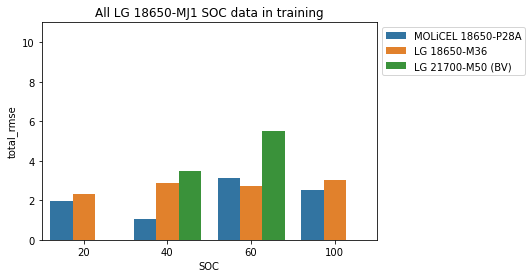

In [12]:

soc_svm_chain_errors = read_errors_soc(errors_cell)
soc_svm_chain_errors

sns.barplot(data=soc_svm_chain_errors, x='SOC', y='total_rmse', hue='Cell-Description')
# title = 'No Reduced SOC data in training, Included all 100% SOC data in training'
# title = 'No Reduced SOC data in training, no P28A or M36 in training'
# title = 'All P28A SOC data in training'
title = 'All LG 18650-MJ1 SOC data in training'
plt.title(title)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.ylim([0,11])
plt.savefig(title + '.png', dpi=200, bbox_inches='tight')
# plt.show()


In [15]:
soc_svm_ypred = read_predictions_soc(y_test_pred_cell)

In [16]:
soc_svm_ypred.value_counts('Cell-Description')

Cell-Description
MOLiCEL 18650-P28A    24
LG 18650-M36          19
LG 21700-M50 (BV)      7
dtype: int64

# Plots

MOLiCEL 18650-P28A
20.0
40.0
60.0
100.0
LG 18650-M36
20.0
40.0
60.0
100.0
LG 21700-M50 (BV)
40.0
60.0


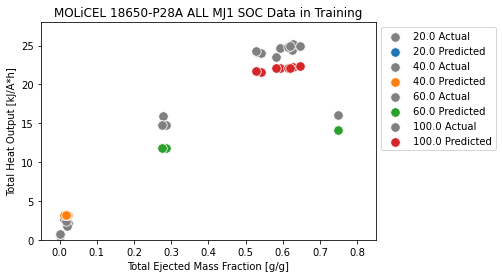

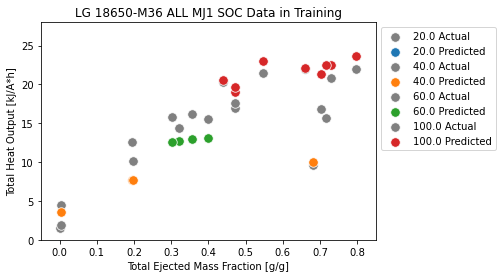

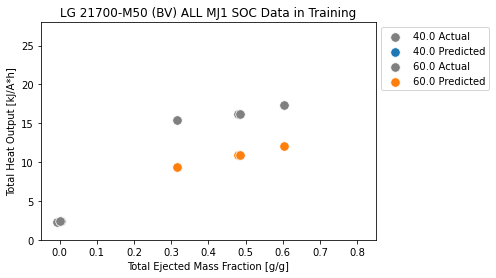

In [18]:

for cell in cells_SOC:
    legend_list = []
    plt.figure()
    print(cell)
    df_temp = soc_svm_ypred[soc_svm_ypred['Cell-Description']==cell]
    
    df_mass_temp= data_test_t.copy(deep=True)
    df_mass_temp = df_mass_temp[df_mass_temp['Cell-Description']==cell]
    SOCs = list(df_mass_temp['Pre-Test-State-of-Charge-%'].value_counts().index)
    SOCs.sort()
    for SOC in SOCs:
        print(SOC)
        df_mass_t = df_mass_temp.copy(deep=True)
        df_mass_t = df_mass_t[df_mass_t['Pre-Test-State-of-Charge-%']==SOC]
        f = sns.scatterplot(data=df_mass_t,
                            x="Total Ejected Mass Fraction [g/g]", y="Total Heat Output [kJ/A*h]",
                            s=90,color='grey', zorder=0)
        
        df_mass_t = df_mass_t[['Total Ejected Mass Fraction [g/g]', 'Positive Ejected Mass Fraction [g/g]', 'Negative Ejected Mass Fraction [g/g]']]

        df_t = df_temp.copy(deep=True)
        df_t = df_t[df_t['SOC']==SOC]
 
        df_t = df_t.reset_index(drop=True).join(df_mass_t.reset_index(drop=True), how='left')

        g = sns.scatterplot(data=df_t,
                            x="Total Ejected Mass Fraction [g/g]", y="Total Heat Output [kJ/A*h]",
                            s=90, palette='tab10', zorder=1)
        
        legend_list.append(str(SOC)+ ' Actual')
        legend_list.append(str(SOC)+ ' Predicted')
    
    plt.legend(legend_list,loc='upper left', bbox_to_anchor=(1, 1.0))
    plt.xlim([-0.05, 0.85])
    plt.ylim([0, 28])
#     title = cell + ' training includes all 100% SOC trials'
    title = cell + ' ALL MJ1 SOC Data in Training'
    plt.title(title)
    plt.savefig(title + '.png', dpi=200, bbox_inches='tight')
    plt.show
    
#     plt.ylim([0, 30])
    
#     g.set_ylabels("")
#     g.set_yticklabels("")
